## Observations and Insights

## Dependencies and starter code

In [856]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inLine



# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_merged_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
mouse_merged_df
# Combine the data into a single dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sem_df = mouse_merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
mean_df = mouse_merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
variance_df = mouse_merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].variance()
median_df = mouse_merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
std_df = mouse_merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
mouse_regimen_df = pd.DataFrame ([
    {"Average TV": mean_df, 
    "Median TV": median_df,
    "Variance TV": variance_df, 
    "STD TV": std_df,
    "SEM": sem_df}])
mouse_regimen_df.head()

In [857]:
sem_df = mouse_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem() 
mean_df = mouse_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean() 
variance_df = mouse_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var() 
median_df = mouse_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median() 
std_df = mouse_merged_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std() 

mouse_regimen_df = pd.DataFrame ( 
    {"Average TV": mean_df,
     "Median TV": median_df,
     "Variance TV": variance_df,
     "STD TV": std_df,
     "SEM": sem_df})
mouse_regimen_df

,Average TV,Median TV,Variance TV,STD TV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Mouse Study')

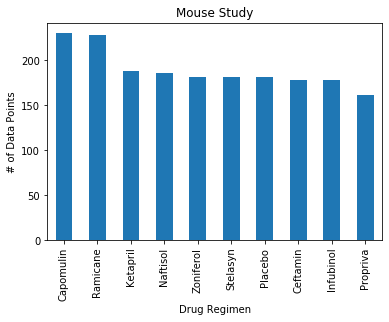

In [858]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

unique_df = mouse_merged_df ["Drug Regimen"].value_counts()

mouse_bar = unique_df.plot(kind = 'bar', legend = False)
mouse_bar.set_ylabel("# of Data Points")
mouse_bar.set_xlabel("Drug Regimen")
mouse_bar.set_title("Mouse Study")

Text(0.5, 1.0, 'Mouse Study')

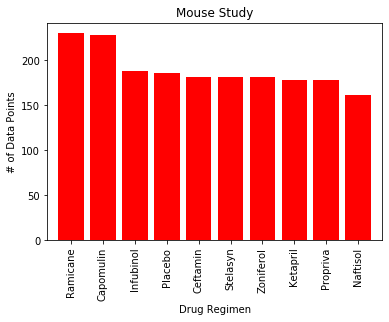

In [859]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(unique_df))
plt.bar(x_axis, unique_df, color='r', align="center")
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, mouse_merged_df ["Drug Regimen"].unique())
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xticks (rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Data Points')
plt.title("Mouse Study")

## Pie plots

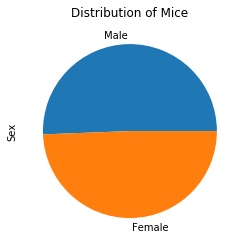

In [860]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mouse_merged_df ["Sex"].value_counts()
gender_df_pie = gender_df.plot(kind = 'pie', title= "Distribution of Mice")


Text(0.5, 1.0, 'Distribution of Mice')

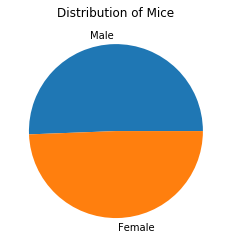

In [861]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df,labels = ['Male', 'Female'])
plt.title("Distribution of Mice")

## Quartiles, outliers and boxplots

In [862]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
#Ramicane
#Propriva
#Ceftamin
final_tv_df = mouse_merged_df.groupby(['Mouse ID']).max().reset_index()
mouse_max_tp = final_tv_df [['Mouse ID','Timepoint']].merge(mouse_merged_df, on = ['Mouse ID','Timepoint'], how = 'left')
#mouse_max_tp
#tv_df
max_mean_tv = mouse_max_tp.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
#max_mean_tv

capomulin = mouse_max_tp.loc[mouse_max_tp['Drug Regimen'] == 'Capomulin']["Tumor Volume (mm3)"]
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lowerbound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upperbound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"The capomulin quartile boundaries are: {capomulin_upperq} and {capomulin_lowerq}")
print(f"Values below {capomulin_lowerbound} could be outliers.")
print(f"Values above {capomulin_upperbound} could be outliers.")

Ramicane = mouse_max_tp.loc[mouse_max_tp['Drug Regimen'] == 'Ramicane']["Tumor Volume (mm3)"]
ramicane_quartiles = Ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lowerbound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upperbound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"The Ramicane quartile boundaries are: {ramicane_upperq} and {ramicane_lowerq}")
print(f"Values below {ramicane_lowerbound} could be outliers.")
print(f"Values above {ramicane_upperbound} could be outliers.")

Propriva = mouse_max_tp.loc[mouse_max_tp['Drug Regimen'] == 'Propriva']["Tumor Volume (mm3)"]
Propriva_quartiles = Propriva.quantile([.25,.5,.75])
Propriva_lowerq = Propriva_quartiles[0.25]
Propriva_upperq = Propriva_quartiles[0.75]
Propriva_iqr = Propriva_upperq - Propriva_lowerq
Propriva_lowerbound = Propriva_lowerq - (1.5*Propriva_iqr)
Propriva_upperbound = Propriva_upperq + (1.5*Propriva_iqr)
print(f"The Propriva quartile boundaries are: {Propriva_upperq} and {Propriva_lowerq}")
print(f"Values below {Propriva_lowerbound} could be outliers.")
print(f"Values above {Propriva_upperbound} could be outliers.")

Ceftamin = mouse_max_tp.loc[mouse_max_tp['Drug Regimen'] == 'Ceftamin']["Tumor Volume (mm3)"]
Ceftamin_quartiles = Ceftamin.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq
Ceftamin_lowerbound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upperbound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
print(f"The Ceftamin quartile boundaries are: {Ceftamin_upperq} and {Ceftamin_lowerq}")
print(f"Values below {Ceftamin_lowerbound} could be outliers.")
print(f"Values above {Ceftamin_upperbound} could be outliers.")


The capomulin quartile boundaries are: 40.1592203 and 32.37735684
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The Ramicane quartile boundaries are: 40.65900627 and 31.56046955
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The Propriva quartile boundaries are: 62.57087961 and 49.12296898
Values below 28.95110303500001 could be outliers.
Values above 82.742745555 could be outliers.
The Ceftamin quartile boundaries are: 64.29983003 and 48.72207785
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


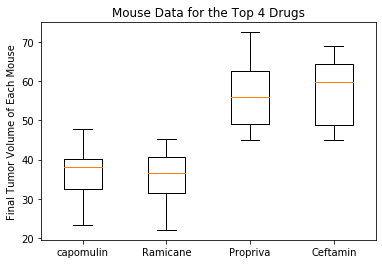

In [863]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_data = [capomulin, Ramicane, Propriva, Ceftamin]

fig1, ax1 = plt.subplots()
ax1.boxplot(drug_data, labels = ['capomulin', 'Ramicane', 'Propriva', 'Ceftamin'])
ax1.set_title('Mouse Data for the Top 4 Drugs')
ax1.set_ylabel('Final Tumor Volume of Each Mouse')
plt.savefig('Mouse Data for the Top 4 Drugs.png')
plt.show()

## Line and scatter plots

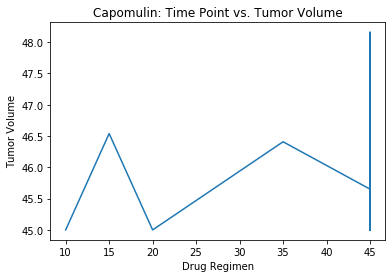

In [864]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin 
capomulin_tv = mouse_merged_df.groupby(['Mouse ID'])
capomulin_v2 = final_tv_df.loc[final_tv_df['Drug Regimen'] == 'Capomulin']
capomulin_v2 = capomulin_v2.sort_values(by = ['Timepoint'], ascending = True)

plt.plot(capomulin_v2['Timepoint'], capomulin_v2['Tumor Volume (mm3)'])
plt.title("Capomulin: Time Point vs. Tumor Volume")
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')
plt.savefig('Capomulin: Time Point vs. Tumor Volume.png')
plt.show()

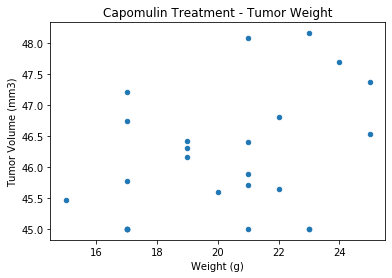

In [865]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_tv = capomulin_v2.groupby(['Mouse ID']).mean()
weight_tv.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)',title='Capomulin Treatment - Tumor Weight')

#gender_group = purchase_data.groupby(["Gender"])
#purch_count = (gender_group["SN"].count())

#total_pv = gender_group["Price"].sum()
#campomulin_v2
plt.savefig('Tumor vs Weight.png')
plt.show()

In [868]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = weight_tv['Weight (g)']
tv_corr = weight_tv['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tv_corr)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.39


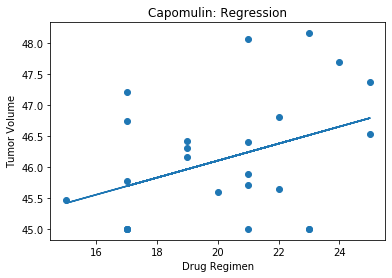

In [873]:

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tv_corr) 
regress_values = weight * slope + intercept
plt.scatter(weight,tv_corr)
plt.plot(weight,regress_values)
plt.title("Capomulin: Regression")
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')
plt.savefig('Regression.png')
plt.show()